In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/gender_submission.csv


### 1. 라이브러리 호출

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('seaborn')
sns.set(font_scale=2.5)

import missingno as msno

import warnings
warnings.filterwarnings('ignore')

/tmp/ipykernel_35/1488016704.py:6: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


앞으로 우리가 해야할 프로세스는 대략 아래와 같습니다.

1. 데이터셋 확인 - 대부분의 캐글 데이터들은 잘 정제되어 있습니다. 하지만 가끔 null data가 존재합니다. 이를 확인하고, 향후 수정합니다.
2. 탐색적 데이터 분석(Exploratory Data Analysis) - 여러 feature들을 개별적으로 분석하고, feature들 간의 상관관계를 확인합니다. 여러 시각화 툴을 사용하여 insight를 얻습니다.
3. Feature Engineering - 모델을 세우기에 앞서, 모델의 성능을 높일 수 있도록 feature들을 engineering 합니다. one-hot encoding, class 나누기, 구간으로 나누기, 텍스트 데이터 처리 등을 합니다.
4. model 만들기 - sklearn을 사용해 모델을 만듭니다. 파이썬에서 머신러닝을 할 때는 sklearn을 사용하면 수많은 알고리즘을 일관된 문법으로 사용할 수 있습니다. 물론 딥러닝을 위해 tensorflow, pytorch등을 사용할 수도 있습니다.
5. 모델 학습 및 예측 - train set을 가지고 모델을 학습시킨 후, test set을 가지고 prediction을 합니다.
6. 모델 평가 - 예측 성능이 원하는 수준인지 판단합니다. 풀려는 문제에 따라 모델을 평가하는 방식도 달라집니다. 학습된 모델이 어떤 것을 학습하였는 지 확인해 봅니다.

### 2. 데이터셋 확인
- 파이썬에서 테이블화 된 데이터를 다루는 데 가장 최적화 되어 있으며, 많이 쓰이는 라이브러리는 pandas입니다.
- 우리는 pandas를 사용하여 데이터셋의 간단한 통계적 분석부터, 복잡한 처리들을 간단한 메소드를 사용하여 해낼 수 있습니다.
- 파이썬으로부터 데이터 분석을 한다고 하면 반드시 능숙해져야 할 라이브러리이니, 여러 커널들을 공부하면서 사용법에 익숙해져야 합니다.
- 캐글에서 데이터셋은 보통 train, test으로 나뉘어 있습니다.

In [3]:
df_train = pd.read_csv('/kaggle/input/titanic/train.csv')
df_test = pd.read_csv('/kaggle/input/titanic/test.csv')

In [4]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


우리가 다루는 문제에서 feature은 Pclass, Age, SibSp, Parch, Fare, Sex이며, 예측하려는 target label은 Survived입니다.

In [5]:
# 통계량 확인
df_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [6]:
# 통계량 확인
df_test.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


- 테이블에서 보다시피, PassengerID 개수와 다른, 그러니까 null data가 존재하는 열(feature)이 있는 것 같습니다.
- 이를 좀 더 보기 편하도록 그래프로 시각화해서 살펴봅시다.

#### 2.1 Null data check

In [7]:
for col in df_train.columns:
    msg = 'column: {:>10}\t Percent of Nan value {:.2f}%'.format(col, 100 * (df_train[col].isnull().sum() / df_train[col].shape[0]))
    print(msg)

column: PassengerId	 Percent of Nan value 0.00%
column:   Survived	 Percent of Nan value 0.00%
column:     Pclass	 Percent of Nan value 0.00%
column:       Name	 Percent of Nan value 0.00%
column:        Sex	 Percent of Nan value 0.00%
column:        Age	 Percent of Nan value 19.87%
column:      SibSp	 Percent of Nan value 0.00%
column:      Parch	 Percent of Nan value 0.00%
column:     Ticket	 Percent of Nan value 0.00%
column:       Fare	 Percent of Nan value 0.00%
column:      Cabin	 Percent of Nan value 77.10%
column:   Embarked	 Percent of Nan value 0.22%


In [8]:
for col in df_test.columns:
    msg = 'column: {:>10}\t Percent of Nan value {:.2f}%'.format(col, 100 * (df_test[col].isnull().sum() / df_test[col].shape[0]))
    print(msg)

column: PassengerId	 Percent of Nan value 0.00%
column:     Pclass	 Percent of Nan value 0.00%
column:       Name	 Percent of Nan value 0.00%
column:        Sex	 Percent of Nan value 0.00%
column:        Age	 Percent of Nan value 20.57%
column:      SibSp	 Percent of Nan value 0.00%
column:      Parch	 Percent of Nan value 0.00%
column:     Ticket	 Percent of Nan value 0.00%
column:       Fare	 Percent of Nan value 0.24%
column:      Cabin	 Percent of Nan value 78.23%
column:   Embarked	 Percent of Nan value 0.00%


- Train, Test 데이터에서 Age(19.87, 20.57), Cabin(77.10, 78.23), Embarked(train만 0.22%) null data가 존재하는 것을 볼 수 있습니다.
- Missingno라는 라이브러리를 사용하면 null data의 존재를 더 쉽게 볼 수 있습니다.

<Axes: >

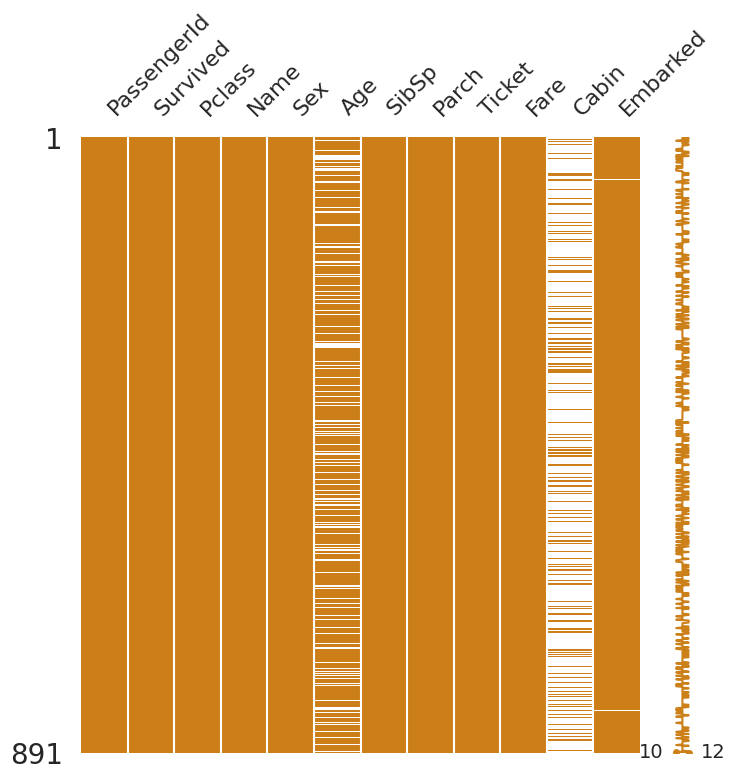

In [9]:
msno.matrix(df=df_train.iloc[:, :], figsize=(8, 8), color=(0.8, 0.5, 0.1))

<Axes: >

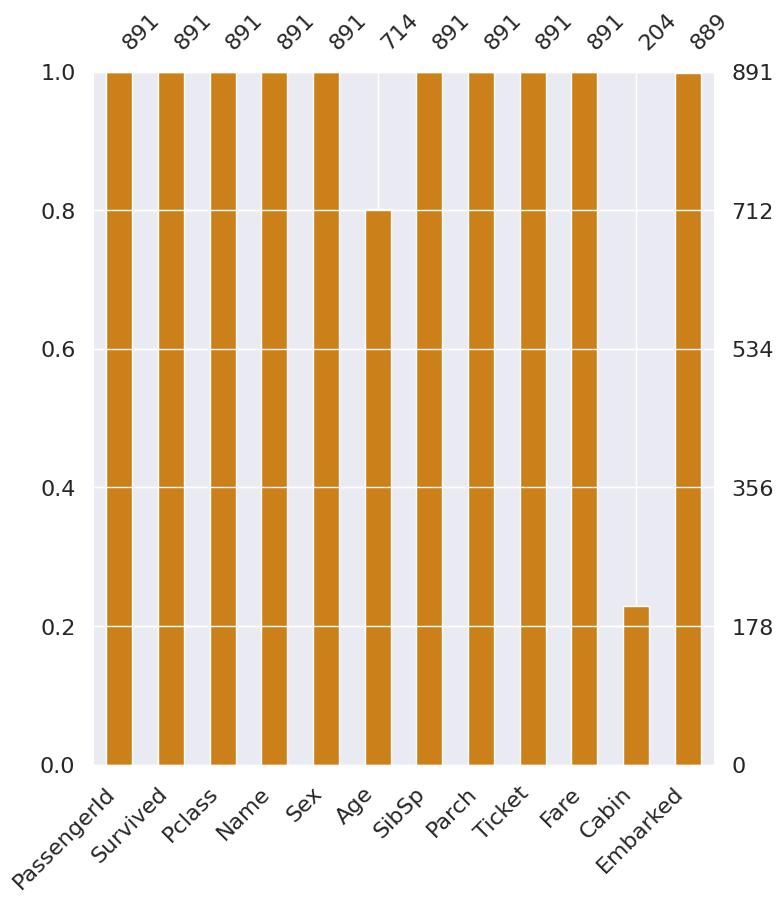

In [10]:
msno.bar(df=df_train.iloc[:, :], figsize=(8, 9), color=(0.8, 0.5, 0.1))

<Axes: >

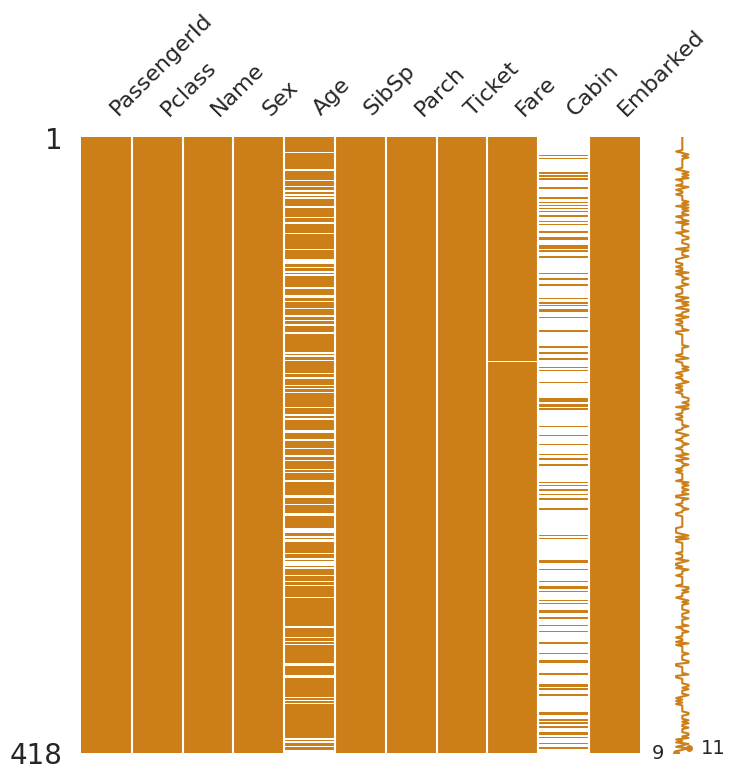

In [11]:
msno.matrix(df=df_test.iloc[:, :], figsize=(8, 8), color=(0.8, 0.5, 0.1))

<Axes: >

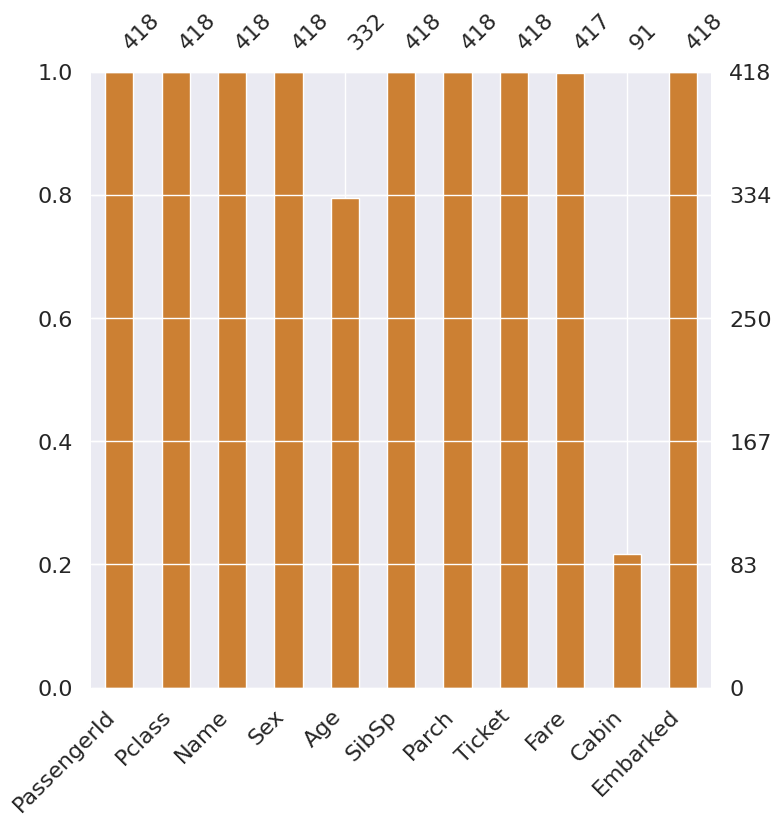

In [12]:
msno.bar(df=df_test.iloc[:, :], figsize=(8, 8), color=(0.8, 0.5, 0.2))

#### 2.2 Target Label 확인

- target label이 어떤 distribution을 가지고 있는지 확인해봐야 합니다.
- 지금 같은 binary classification 문제의 경우에서, 1과 0의 분포가 어떠냐에 따라 모델의 평가 방법이 달라질 수 있습니다.

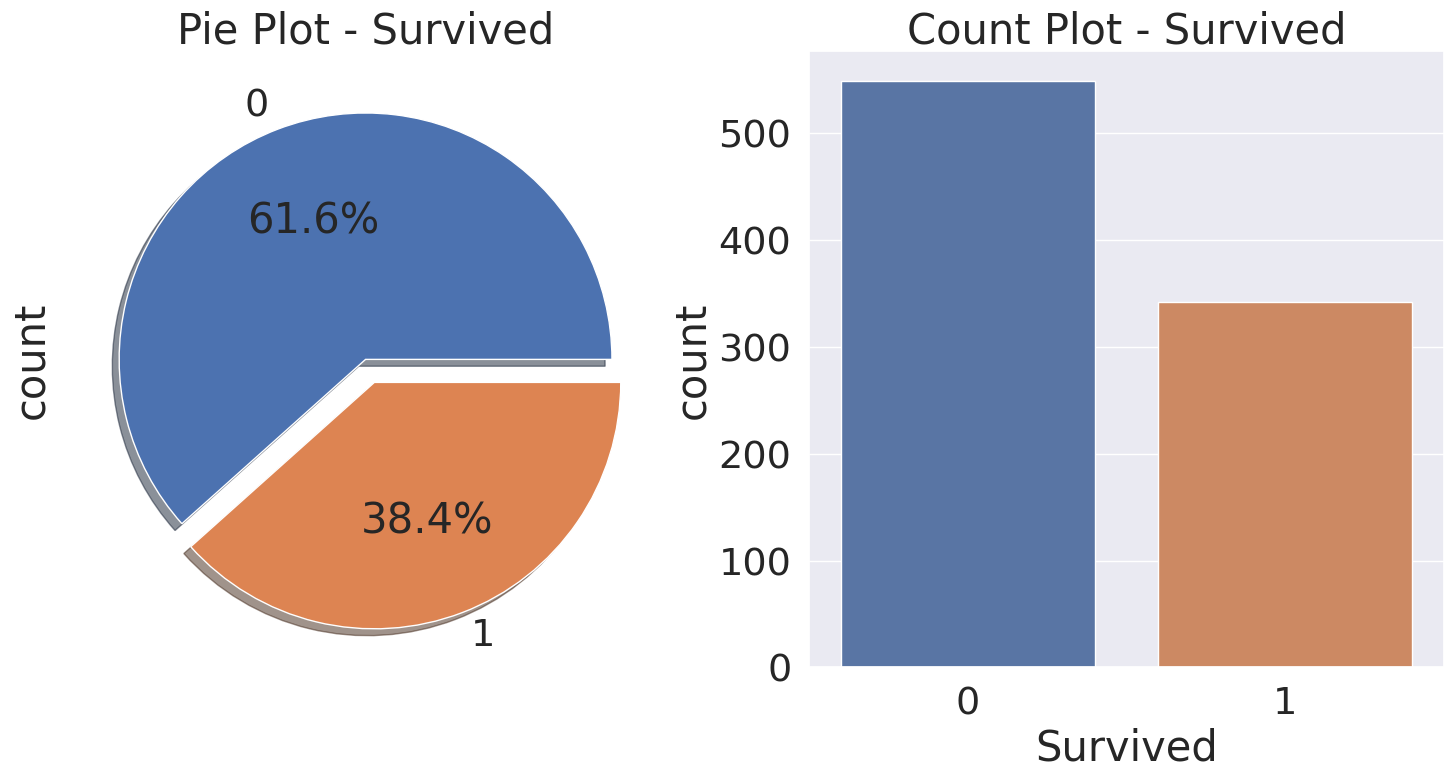

In [13]:
f, ax = plt.subplots(1, 2, figsize=(18, 8))

df_train['Survived'].value_counts().plot.pie(explode=[0, 0.1], autopct='%1.1f%%', ax=ax[0], shadow=True)
# explode = [0, 0.1]: 각 파이 조각을 중심에서 얼마나 떨어뜨릴지를 설정, 리스트의 순서는 value_counts()의 결과 순서에 맞춰야 함
# 여기선 두 번째 조각을 살짝 띄워 강조
# autopct는 각 조각에 비율(%)을 표시해주는 옵션

ax[0].set_title('Pie Plot - Survived')

sns.countplot(x='Survived', data=df_train, ax=ax[1])
ax[1].set_title('Count Plot - Survived')

plt.show()


### 3. Exploratory Data Analysis

- 이제 본격적으로 데이터 분석을 해보겠습니다. 데이터는 매우 많습니다. 이 많은 데이터 안에 숨겨진 사실을 찾기 위해선 적절한 시각화가 필요합니다.
- 시각화 라이브러리는 matplotlib, seaborn, plotly등이 있습니다. 특정 목적에 맞는 소스 코드를 정리해두어 필요할 때마다 참고하면 편합니다.

#### 3.1 Pclass
- 먼제 Pclass에 대해서 살펴보겠습니다. Pclass는 Ordinal, 순서형 데이터입니다. 카테고리이면서, 순서가 있는 데이터 타입입니다.
- Pclass에 따른 생존률의 차이를 살펴보겠습니다. 엑셀의 피벗 차트와 유사한 작업을 하게 되는데, pandas dataframe에서는 groupby를 사용하면 쉽게 할 수 있습니다. 또한 pivot이라는 메서드도 있습닏.
- 'Pclass', 'Survived'를 가져온 후, Pclass로 묶습니다. 그러고 나면 각 Pclass마다 0, 1이 count가 되는데, 이를 평균내면 각 Pclass별 생존률이 나옵니다.
- 아래와 같이 count()를 하면, 각 class에 몇 명이 있는지 확인할 수 있으며, sum()을 하면, 216명 중 생존한 사람의 총합을 주게 됩니다.

In [14]:
# Pclass 별 몇 명이 있는지
df_train[['Pclass', 'Survived']].groupby(['Pclass'], as_index=True).count()

,Survived
Pclass,
1,216
2,184
3,491


In [15]:
# Pclass 별 생존자가 몇 명이 있는지
df_train[['Pclass', 'Survived']].groupby(['Pclass'], as_index=True).sum()

,Survived
Pclass,
1,136
2,87
3,119


In [16]:
pd.crosstab(df_train['Pclass'], df_train['Survived'], margins=True).style.background_gradient(cmap='summer_r')

Survived,0,1,All
Pclass,,,
1,80,136,216
2,97,87,184
3,372,119,491
All,549,342,891


<Axes: xlabel='Pclass'>

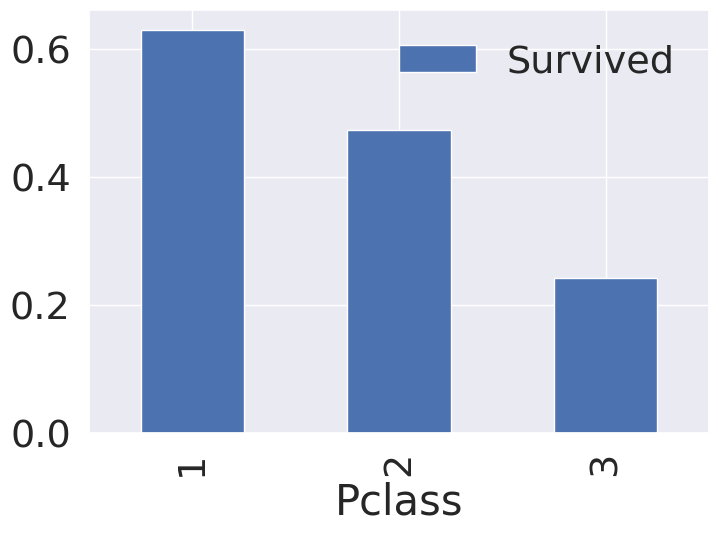

In [17]:
df_train[['Pclass', 'Survived']].groupby(['Pclass'], as_index=True).mean().sort_values(by='Survived', ascending=False).plot.bar()

- 보다시피, Pclass가 좋을수록 생존률이 높은 것을 확인할 수 있습니다.
- 좀 더 보기 쉽게 그래프를 그려보겠습니다. Seaborn의 countplot을 활용하면, 특정 label에 따른 개수를 확인해볼 수 있습니다.

countplot 함수 설명

- x='Pclass' -> x축 혹은 객실 등급
- hue='Survived' -> 생존 여부로 색깔 분리 (0=사망, 1=생존)
- sns.countplot() -> 각 조합의 개수를 세서 그려주는 막대 그래프
- ax=ax[1] -> 오른쪽 subplot에 그림

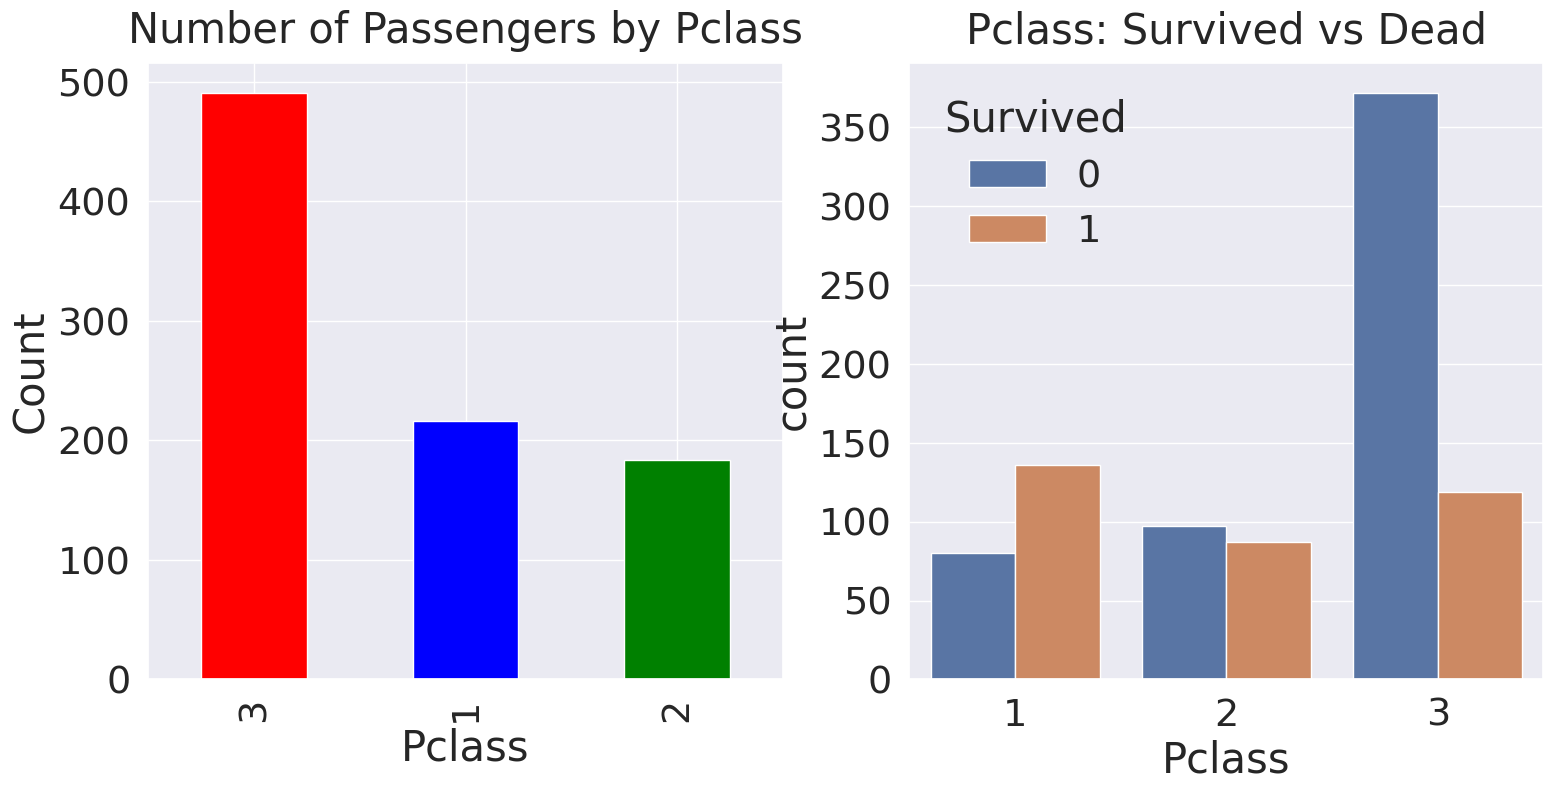

In [18]:
y_pos = 1.02
f, ax = plt.subplots(1, 2, figsize=(18, 8))
df_train['Pclass'].value_counts().plot.bar(color=['red', 'blue', 'green'], ax=ax[0])
ax[0].set_title('Number of Passengers by Pclass', y=y_pos)
ax[0].set_ylabel('Count')

sns.countplot(x='Pclass', hue='Survived', data=df_train, ax=ax[1])
ax[1].set_title('Pclass: Survived vs Dead', y=y_pos)
plt.show()

- 클래스가 높을수록, 생존 확률이 높은걸 확인할 수 있습니다.
- 우리는 생존에 Pclass가 큰 영향을 미친다고 생각해볼 수 있으며, 나중에 모델을 세울 때 이 feature을 사용하는 것이 좋을 것이라 판단할 수 있습니다.

#### 3.2 Sex

- 이번에는 성별로 생존률이 어떻게 달라지는 지 확인해보겠습니다.
- 마찬가지로 pandas groupby와 seaborn countplot을 사용해서 시각화 해봅시다.

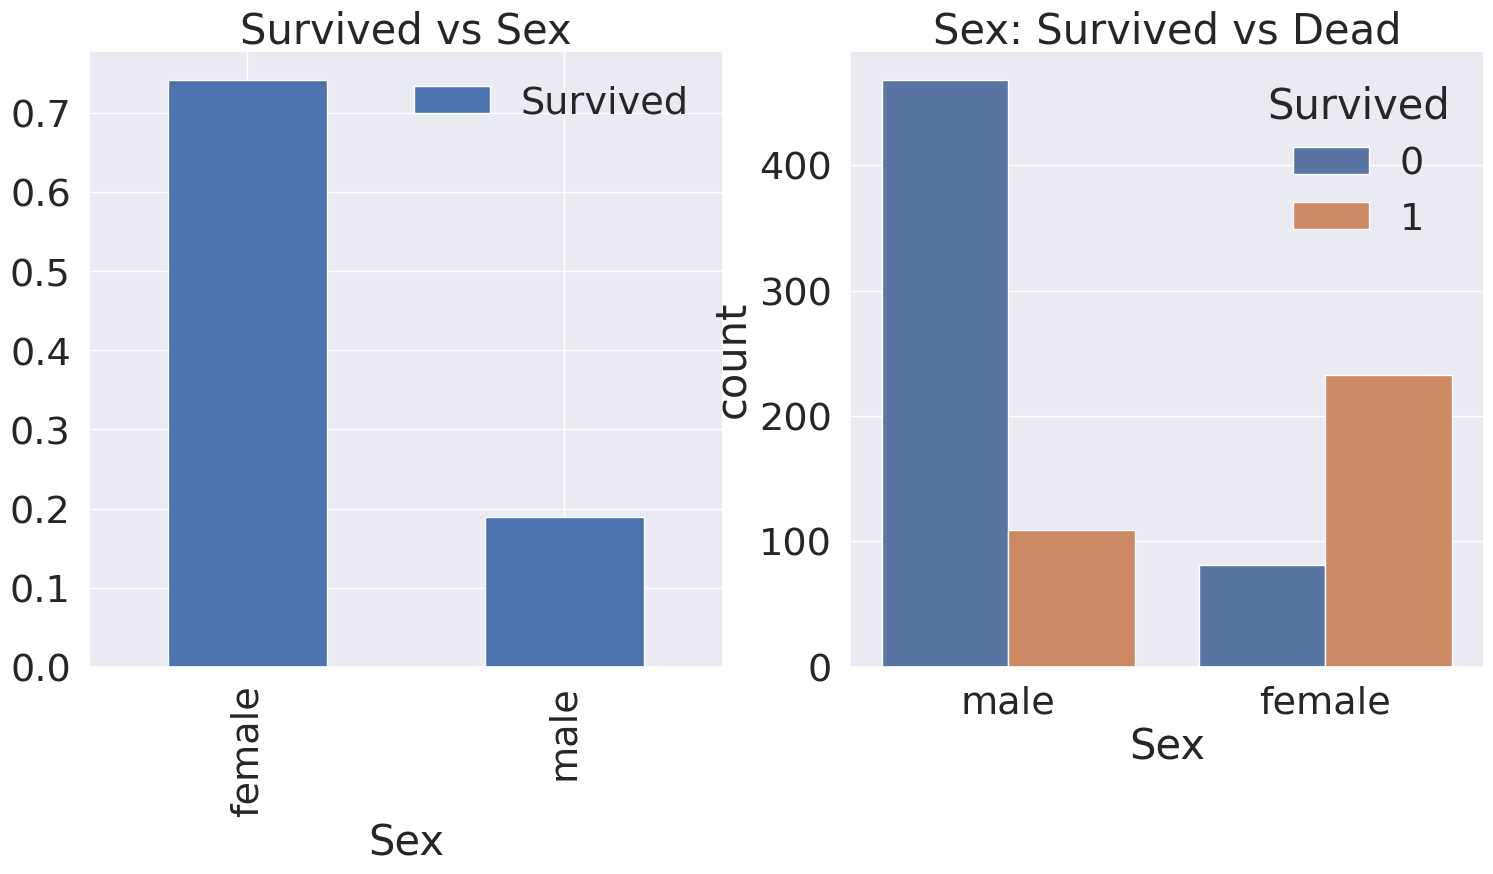

In [19]:
f, ax = plt.subplots(1, 2, figsize=(18, 8))
df_train[['Sex', 'Survived']].groupby(['Sex'], as_index=True).mean().plot.bar(ax=ax[0])
ax[0].set_title('Survived vs Sex')

sns.countplot(x='Sex', hue='Survived', data=df_train, ax=ax[1])
ax[1].set_title('Sex: Survived vs Dead')
plt.show()

- 여자가 생존을 많이 한 것을 알 수 있습니다.

In [20]:
df_train[['Sex', 'Survived']].groupby(['Sex'], as_index=True).mean().sort_values(by='Survived', ascending=False)

,Survived
Sex,
female,0.742038
male,0.188908


In [21]:
pd.crosstab(df_train['Sex'], df_train['Survived'], margins=True).style.background_gradient(cmap='summer_r')

Survived,0,1,All
Sex,,,
female,81,233,314
male,468,109,577
All,549,342,891


#### 3.3 Both Sex and Pclass

- 이번에는 Sex, Pclass 두 가지에 관하여 생존이 어떻게 달라지는 지 확인해 봅시다.
- Seaborn의 catplot을 이용하면, 손쉽게 3개의 차원으로 이루어진 그래프를 그릴 수 있습니다.
- catplot()은 범주형 데이터의 관계를 시각화하는 통합 함수입니다.

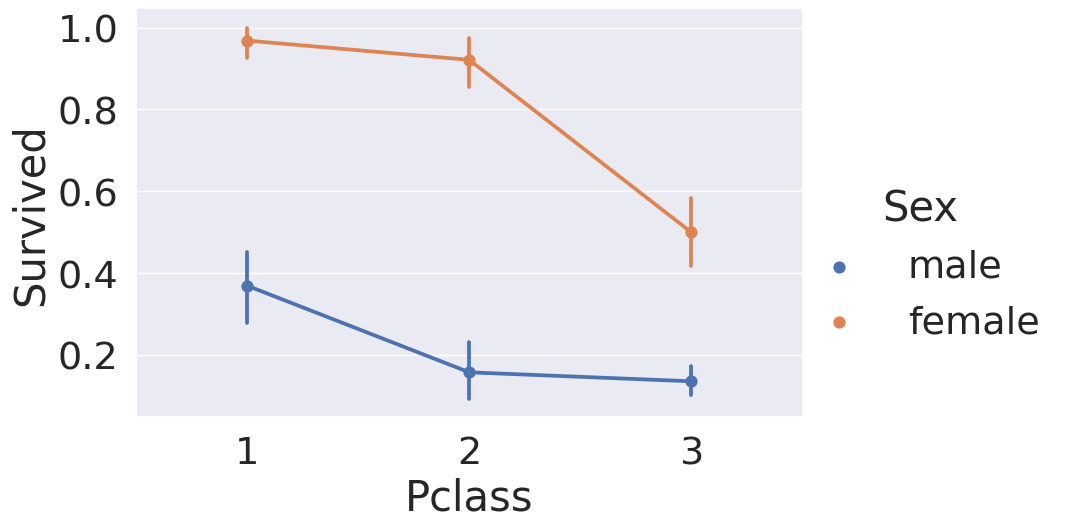

In [22]:
sns.catplot(x='Pclass', y='Survived', hue='Sex', data=df_train, kind='point',height=6, aspect=1.5)

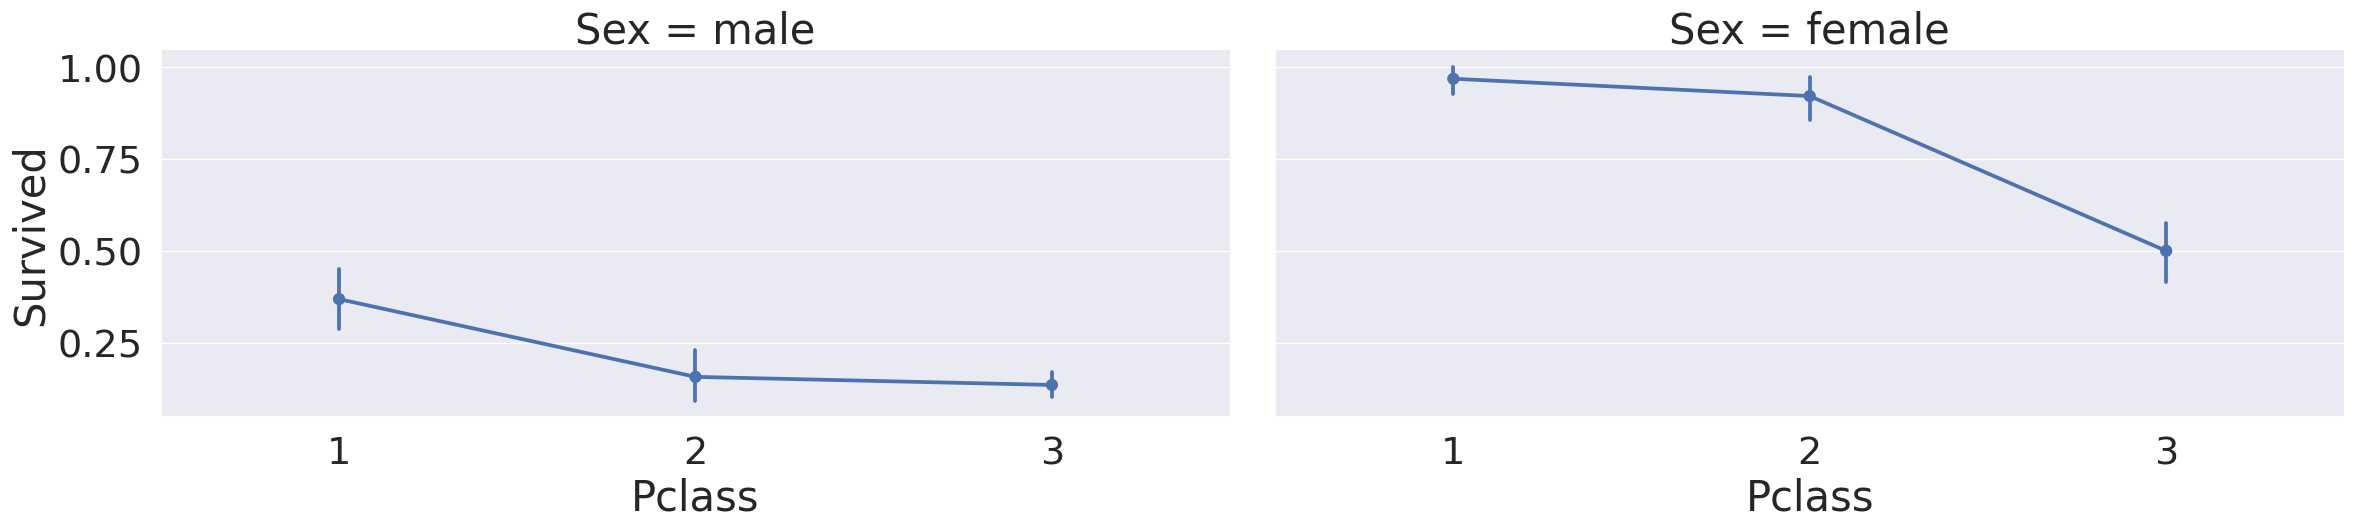

In [23]:
sns.catplot(x='Pclass', y='Survived', col='Sex', data=df_train, kind='point', height=6, aspect=2)

#### 3.4 Age

- 이번에는 Age feature를 살펴보겠습니다.

In [24]:
print(f"제일 나이 많은 탑승객: {df_train['Age'].max():.1f}")
print(f"제일 어린 탑승객: {df_train['Age'].min():.1f}")
print(f"탑승객 평균 나이: {df_train['Age'].mean():.1f}")

제일 나이 많은 탑승객: 80.0
제일 어린 탑승객: 0.4
탑승객 평균 나이: 29.7


- 생존에 따른 Age의 histogram을 그려보겠습니다.

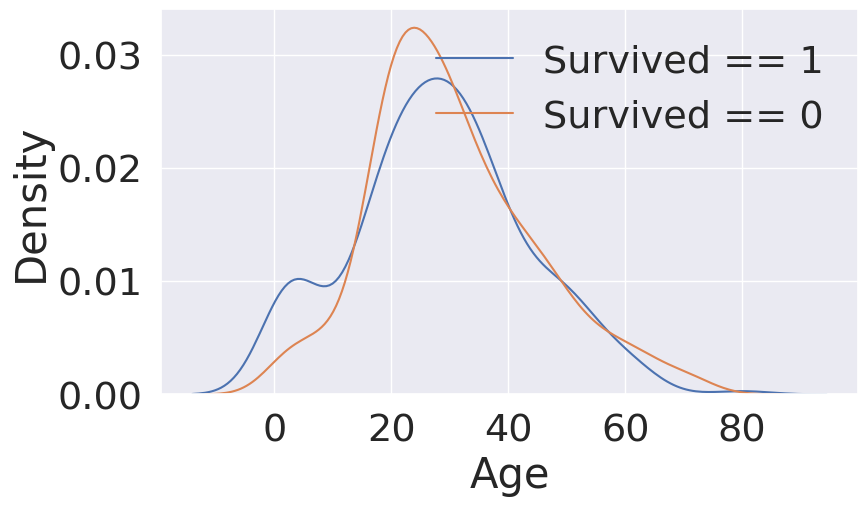

In [26]:
f, ax = plt.subplots(1, 1, figsize=(9, 5))

sns.kdeplot(df_train[df_train['Survived'] == 1]['Age'], ax=ax)
sns.kdeplot(df_train[df_train['Survived'] == 0]['Age'], ax=ax)

plt.legend(['Survived == 1', 'Survived == 0'])
plt.show()

- 생존자 중 나이가 어린 경우가 많음을 볼 수 있습니다.

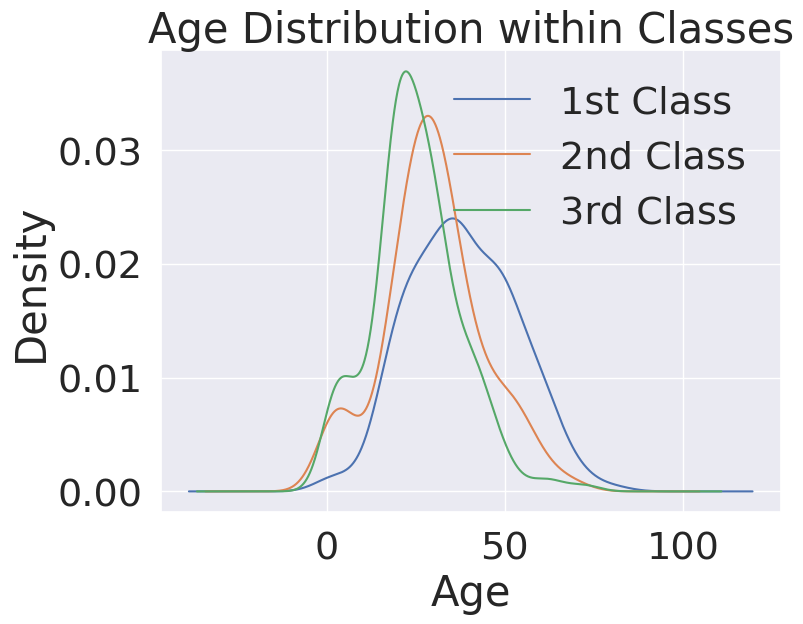

In [28]:
# Age distribution within classes
plt.figure(figsize=(8, 6))

df_train['Age'][df_train['Pclass'] == 1].plot(kind='kde') 
df_train['Age'][df_train['Pclass'] == 2].plot(kind='kde') 
df_train['Age'][df_train['Pclass'] == 3].plot(kind='kde') 

plt.xlabel('Age')
plt.title('Age Distribution within Classes')
plt.legend(['1st Class', '2nd Class', '3rd Class'])

- Pclass가 높을수록 나이가 많은 사람의 비중이 커짐
- 나이대가 변하면서 생존률이 어떻게 되는지 확인해보자.

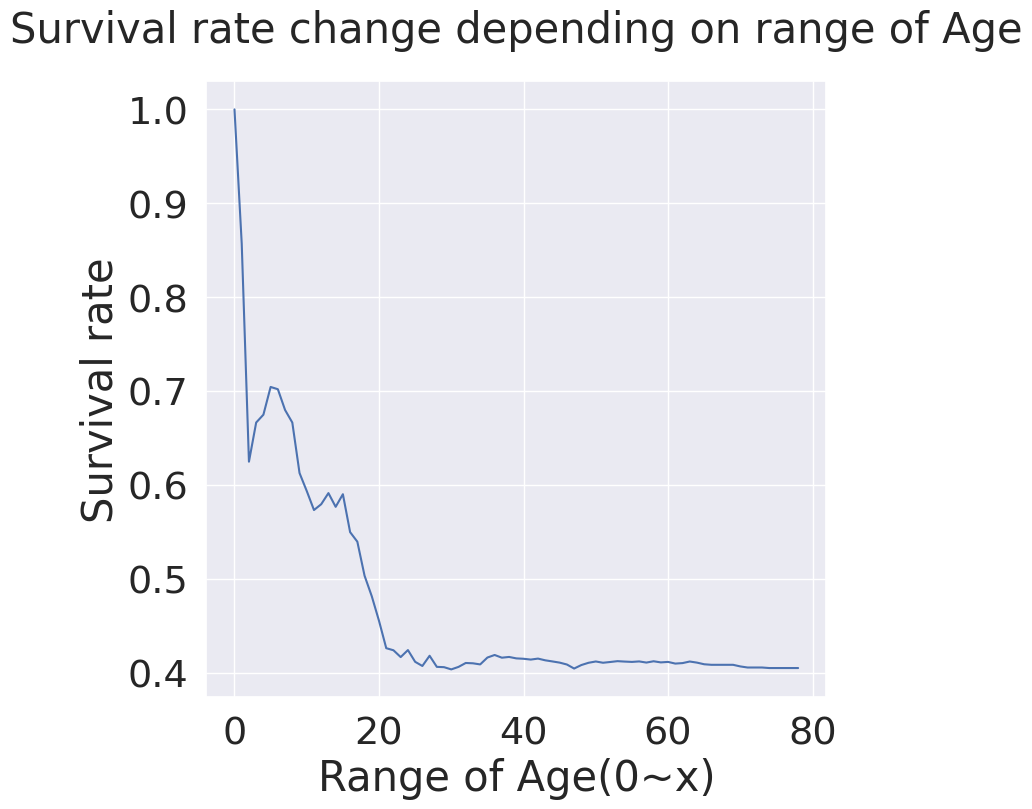

In [29]:
cummulate_survival_ratio = []

for i in range(1, 80):
    cummulate_survival_ratio.append(df_train[df_train['Age'] < i]['Survived'].sum() / len(df_train[df_train['Age'] < i]['Survived']))

plt.figure(figsize=(8, 8))
plt.plot(cummulate_survival_ratio)
plt.title('Survival rate change depending on range of Age', y=1.05)
plt.ylabel('Survival rate')
plt.xlabel('Range of Age(0~x)')
plt.show()

- 확실히, 나이가 어릴수록 생존률이 확실히 높은것을 확인할 수 있습니다.
- 우리는 이 나이가 중요한 feature로 쓰일 수 있음을 확인했습니다.

#### 3.5 Pclass, Sex, Age

- 지금까지 본, Sex, Pclass, Age, Survived 모두에 대해서 보고 싶습니다. 이를 쉽게 그려주는 것이 Seaborn의 violinplot입니다.
- x 축은 우리가 나눠서 보고 싶어하는 case(Pclass, Sex)를 나타내고, Y축은 Age.

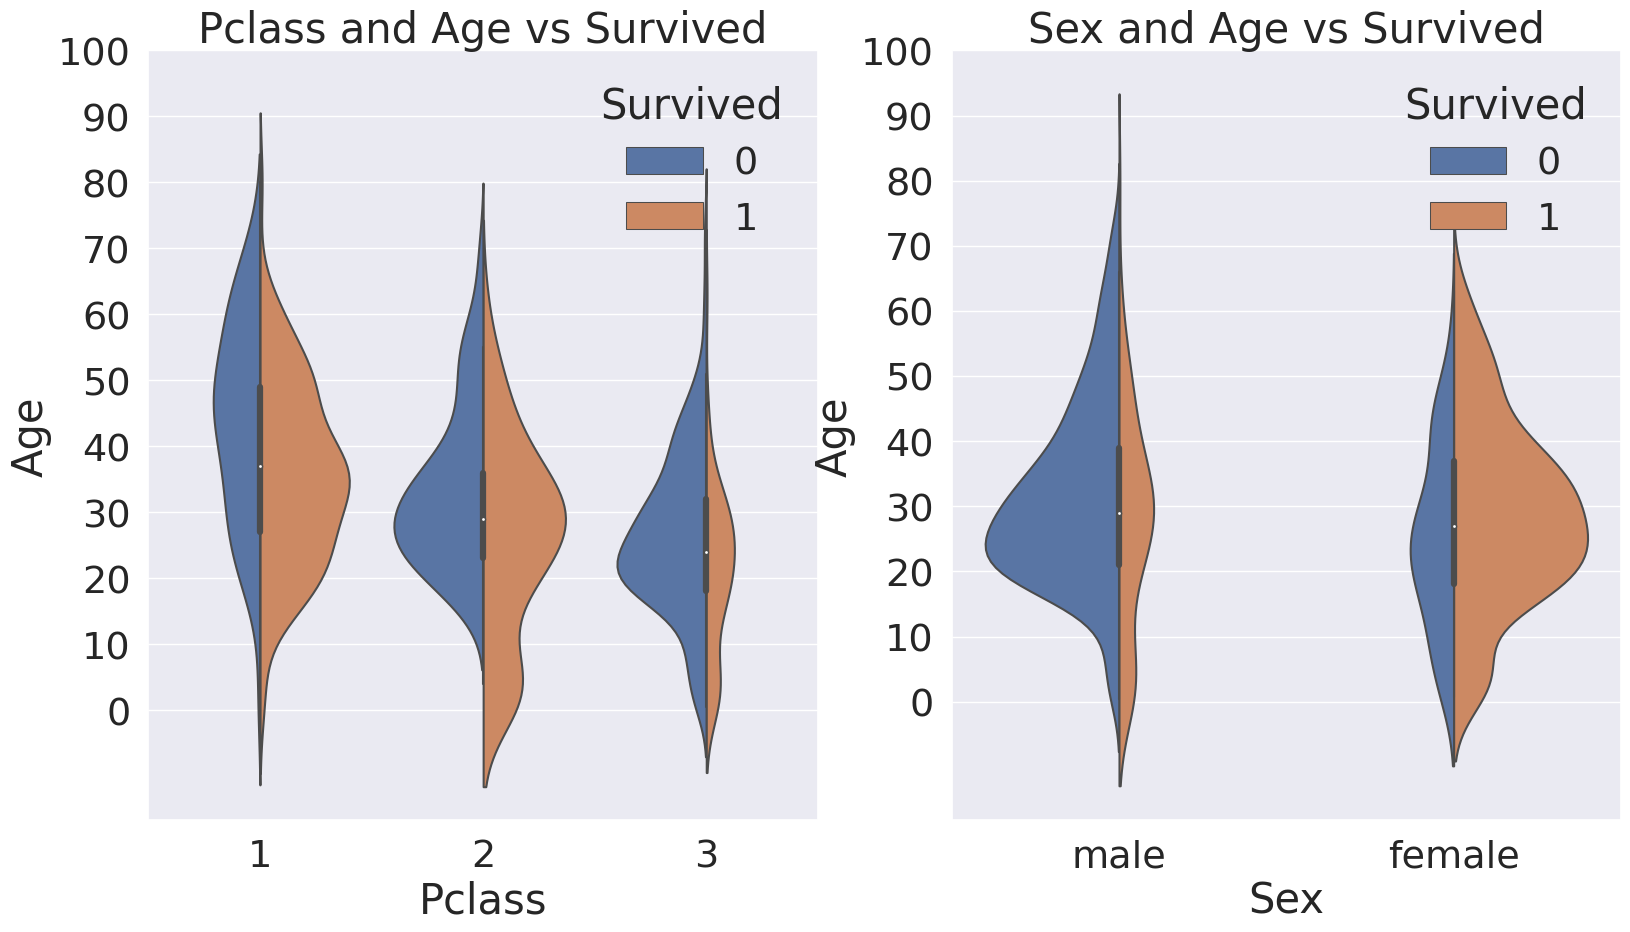

In [37]:
f, ax = plt.subplots(1, 2, figsize=(19, 10))

sns.violinplot(x='Pclass', y='Age', hue='Survived', data=df_train, scale='count', split=True, ax=ax[0])
ax[0].set_title('Pclass and Age vs Survived')
ax[0].set_yticks(range(0, 110, 10))

sns.violinplot(x='Sex', y='Age', hue='Survived', data=df_train, scale='count', split=True, ax=ax[1])
ax[1].set_title('Sex and Age vs Survived')
ax[1].set_yticks(range(0, 110, 10))

#### 3.6 Embarked
- Embarked는 탑승한 항구를 나타냅니다.
- 위에서 해왔던 것과 비슷하게 탑승한 곳에 따라 생존률을 보겠습니다.

<Axes: xlabel='Embarked'>

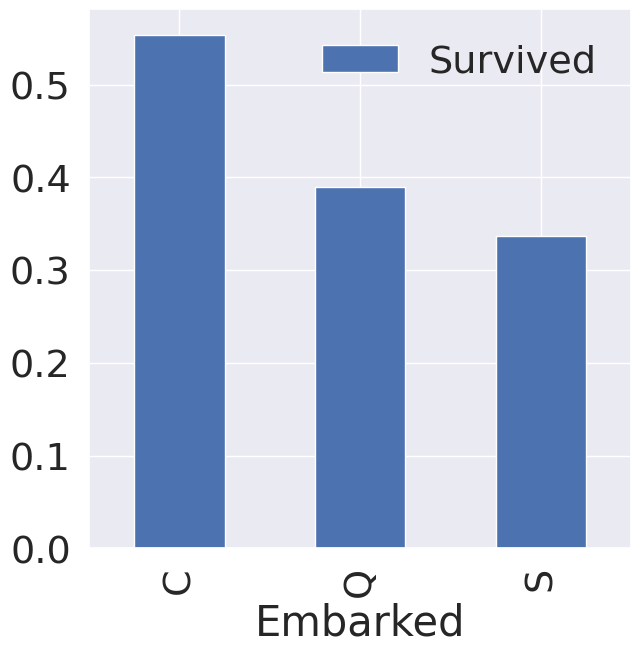

In [38]:
f, ax = plt.subplots(1, 1, figsize=(7, 7))
df_train[['Embarked', 'Survived']].groupby(['Embarked'], as_index=True).mean().sort_values(by='Survived', ascending=False).plot.bar(ax=ax)

- 조금의 차이는 있지만 생존률이 크게 차이가 나지 않습니다. 그럼에도 불구하고 C가 제일 높습니다.
- 모델에 얼마나 큰 영향을 미칠지는 모르겠지만, 그래도 사용해보겠습니다.
- 사실, 모델을 만들고 나면 우리가 사용한 feature들이 얼마나 중요한 역할을 했는지 확인해볼 수 있습니다.

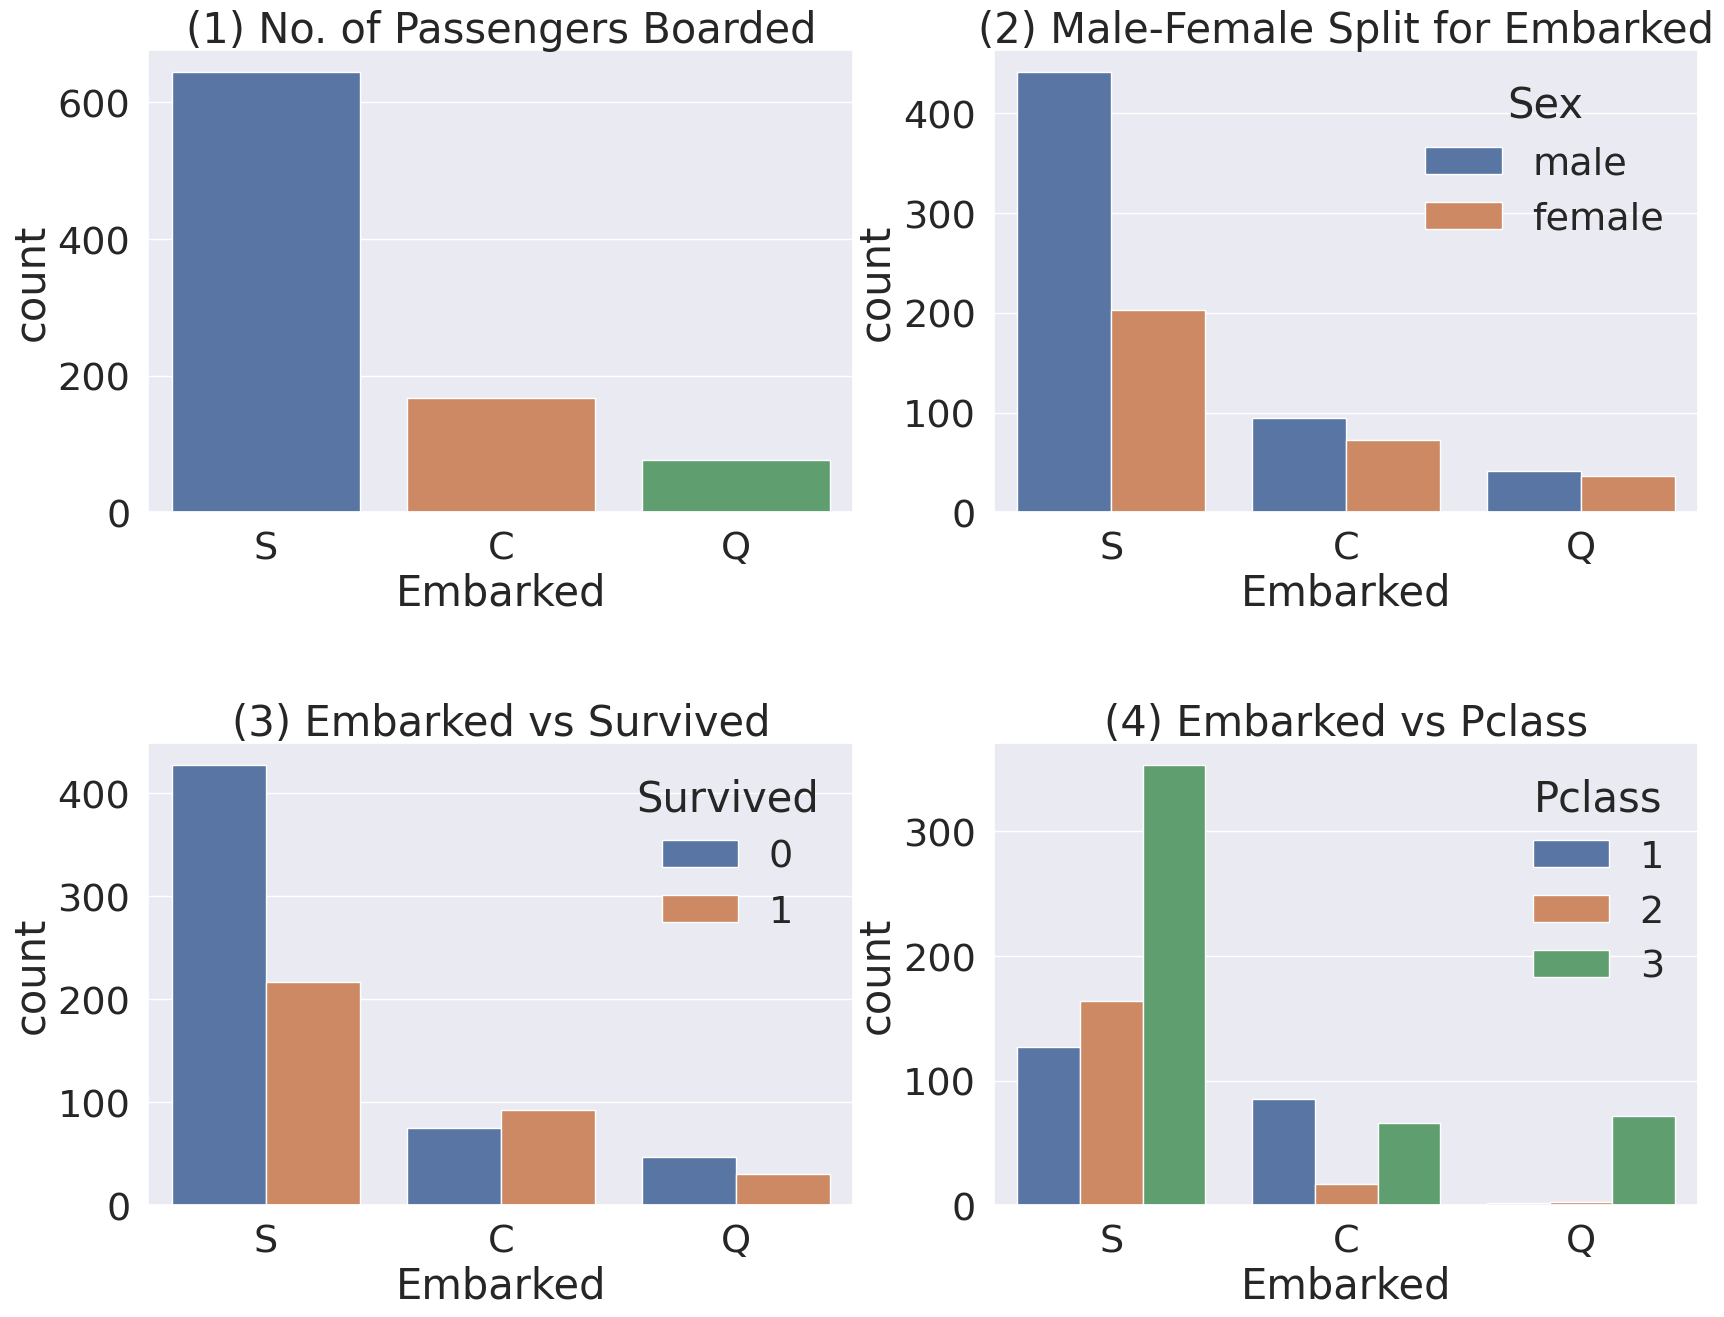

In [41]:
f, ax = plt.subplots(2, 2, figsize=(20, 15))

sns.countplot(x='Embarked', data=df_train,ax=ax[0, 0])
ax[0, 0].set_title('(1) No. of Passengers Boarded')

sns.countplot(x='Embarked', hue='Sex', data=df_train, ax=ax[0, 1])
ax[0, 1].set_title('(2) Male-Female Split for Embarked')

sns.countplot(x='Embarked', hue='Survived', data=df_train, ax=ax[1, 0])
ax[1, 0].set_title('(3) Embarked vs Survived')

sns.countplot(x='Embarked', hue='Pclass', data=df_train, ax=ax[1, 1])
ax[1, 1].set_title('(4) Embarked vs Pclass')

plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()

#### 3.7 Family - SibSp(형제 자매) + Parch(부모, 자녀)
- SibSp와 Parch를 합치면 Family

In [42]:
df_train['Family'] = df_train['SibSp'] + df_train['Parch'] + 1
df_test['Family'] = df_test['SibSp'] + df_test['Parch'] + 1

In [43]:
print(f"Maximum size of Family: {df_train['Family'].max()}")
print(f"Minimum size of Family: {df_train['Family'].min()}")

Maximum size of Family: 11
Minimum size of Family: 1


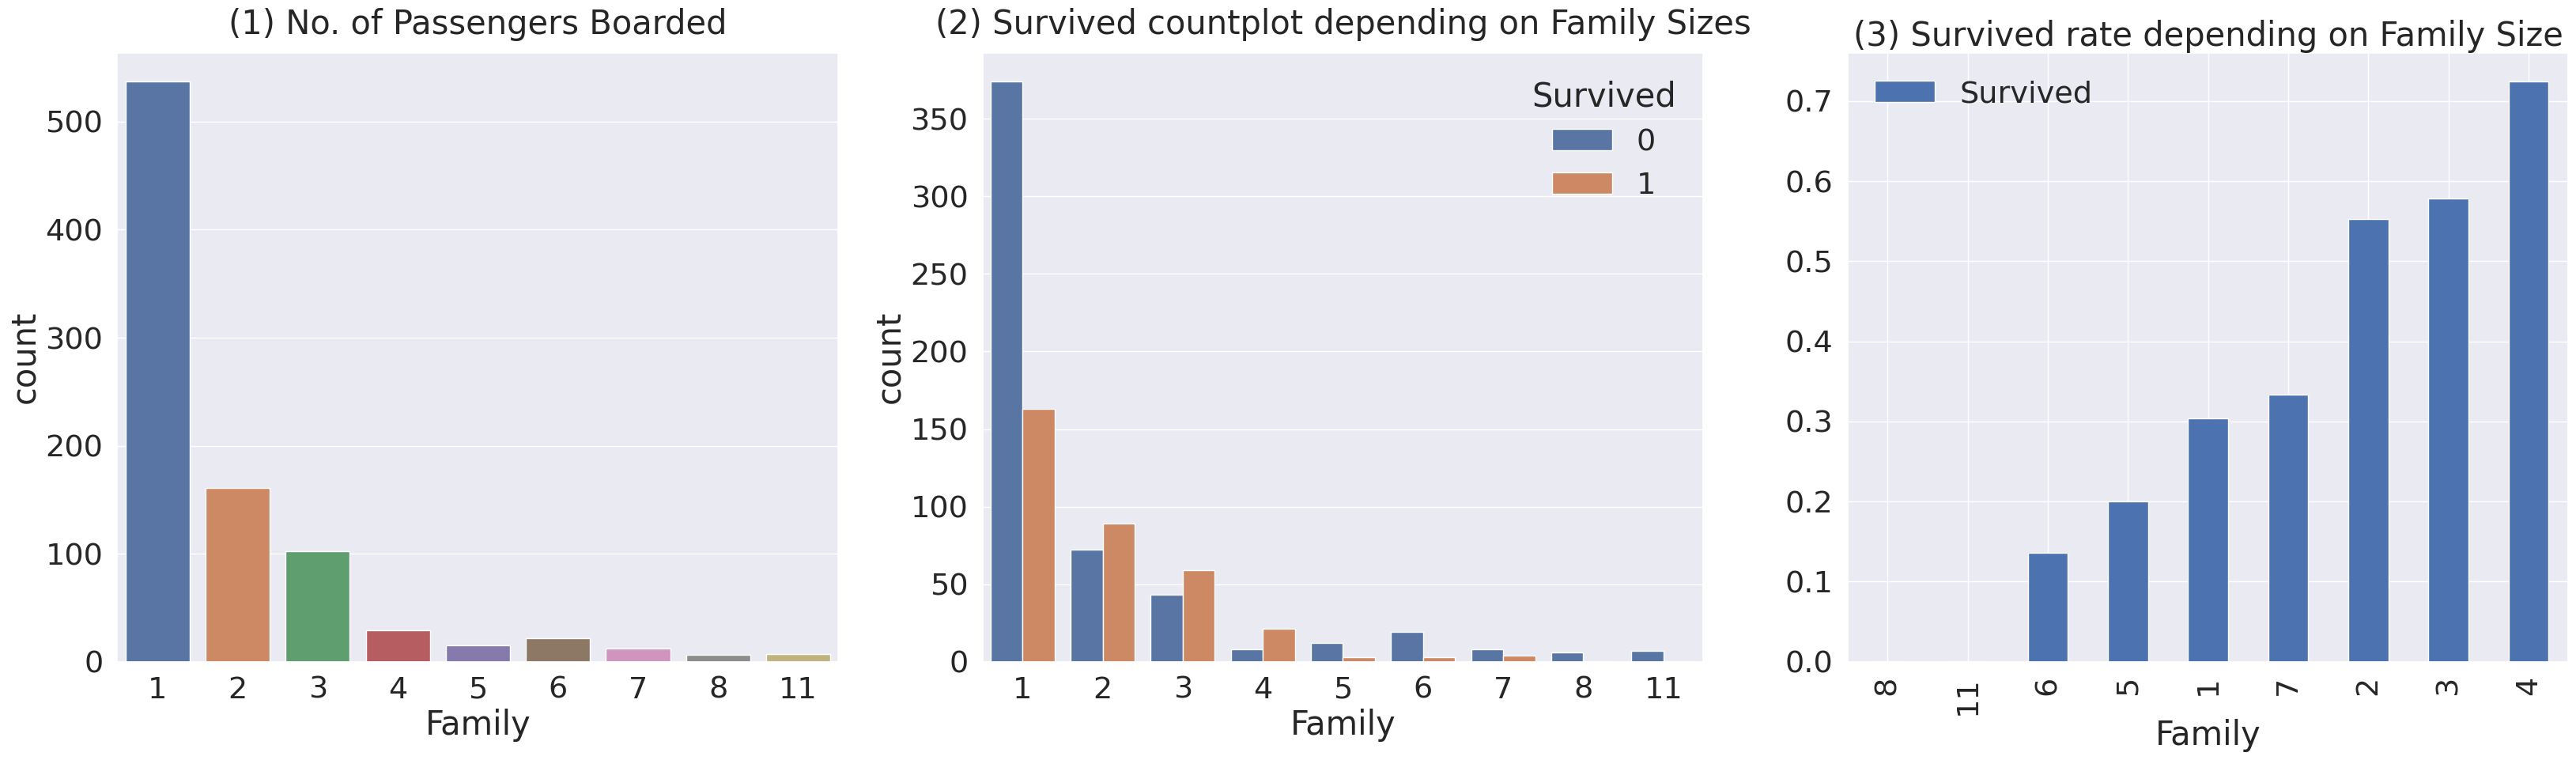

In [49]:
f, ax = plt.subplots(1, 3, figsize=(40, 10))

sns.countplot(x='Family', data=df_train, ax=ax[0])
ax[0].set_title('(1) No. of Passengers Boarded', y=1.02)

sns.countplot(x='Family', hue='Survived', data=df_train, ax=ax[1])
ax[1].set_title('(2) Survived countplot depending on Family Sizes', y=1.02)

df_train[['Family', 'Survived']].groupby(['Family'], as_index=True).mean().sort_values(by='Survived', ascending=True).plot.bar(ax=ax[2])
ax[2].set_title('(3) Survived rate depending on Family Size')

plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()

#### 3.8 Fare
- Fare은 탑승 요금이며, continuous feature입니다.
  

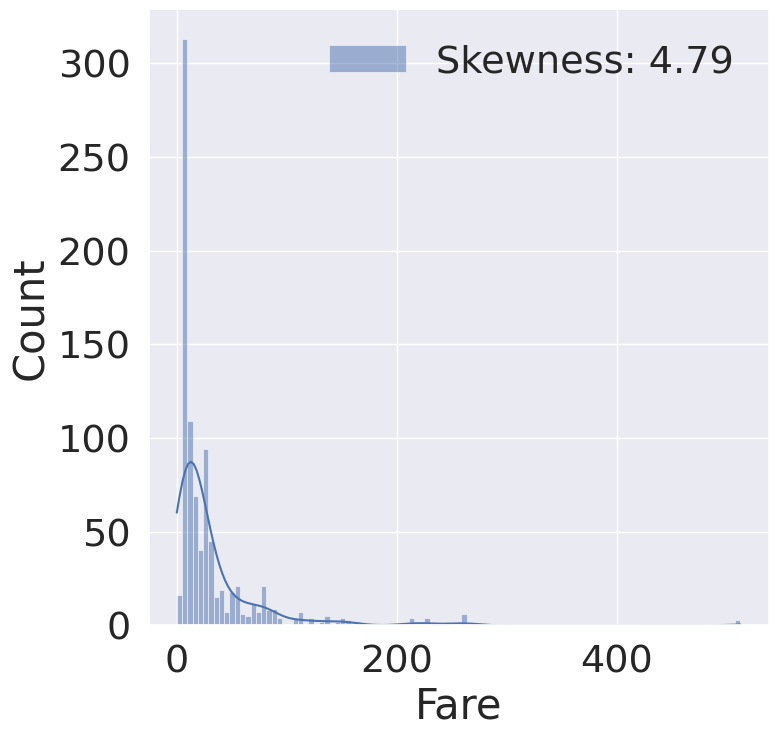

In [50]:
f, ax = plt.subplots(1, 1, figsize=(8, 8))
g = sns.histplot(df_train['Fare'], color='b', kde=True, label='Skewness: {:.2f}'.format(df_train['Fare'].skew()), ax=ax)
g = g.legend(loc='best')

In [52]:
df_test.loc[df_test['Fare'].isnull(), 'Fare'] = df_test['Fare'].mean() # testset 에 있는 nan value 를 평균값으로 치환합니다.

In [53]:
df_train['Fare'] = df_train['Fare'].map(lambda x: np.log(x) if x > 0 else 0)
df_test['Fare'] = df_test['Fare'].map(lambda x: np.log(x) if x > 0 else 0)

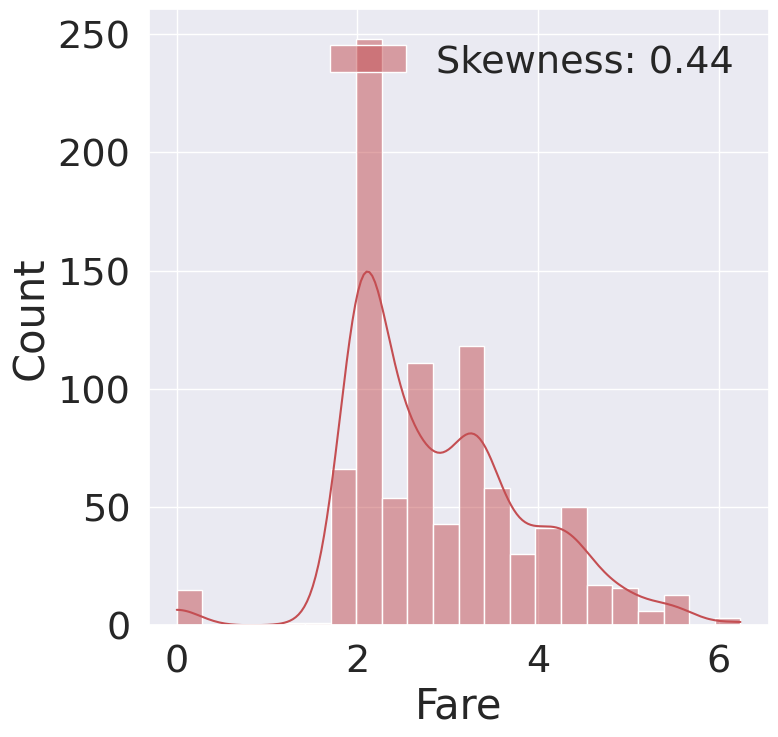

In [54]:
f, ax = plt.subplots(1, 1, figsize=(8, 8))
g = sns.histplot(df_train['Fare'], kde=True, color='r', label='Skewness: {:.2f}'.format(df_train['Fare'].skew()), ax=ax)
g = g.legend(loc='best')

#### 3.9 Cabin
- 이 feature은 NaN이 약 77%이므로, 생존에 영향을 미칠 중요한 정보를 얻어내기가 쉽지 않습니다.
- 그러므로 우리가 세우려는 모델에 포함시키지 않도록 하겠습니다.

In [55]:
df_train['Cabin'].isnull().sum() / len(df_train['Cabin'])

0.7710437710437711

In [56]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Family
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,1.981001,NaN,S,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,4.266662,C85,C,2
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,2.070022,NaN,S,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,3.972177,C123,S,2
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,2.085672,NaN,S,1


#### 3.10 Ticket
- 이 feature은 NaN이 없습니다. 일단 String data이므로 우리가 어떤 작업들을 해주어야 실제 모델에 사용할 수 있는데, 이를 위해선 사실 아이디어가 필요합니다.

In [57]:
df_train['Ticket'].value_counts()

Ticket
347082      7
CA. 2343    7
1601        7
3101295     6
CA 2144     6
           ..
9234        1
19988       1
2693        1
PC 17612    1
370376      1
Name: count, Length: 681, dtype: int64

In [61]:
df_train['Ticket'].nunique()

681

In [62]:
df_train['Ticket'].describe()

count        891
unique       681
top       347082
freq           7
Name: Ticket, dtype: object